# Flood prediction Model

In [52]:
#Import some basic libraries
import numpy as np
import pandas as pd

# Data Insight

In [53]:
#Read the data present in dataset
##data = pd.read_csv('../input/kerela-flood/kerala.csv')

data = pd.read_csv('../input/my-district-dataset/FLOOD PREDICTION MALAYSIA.csv')
#data = pd.read_csv('../input/simpleflooddata/Flood_Rain_Simple_Data.csv')

#Using data.head() we can see the top 5 rows of the dataset
data.head()

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,0V,DEC,ANNUAL RAINFALL,FLOOD
0,108,108001,2000,158.83,162.37,210.68,192.51,214.73,157.55,98.80,165.63,289.14,388.77,313.59,213.60,2566.19,0
1,108,108001,2001,159.10,41.71,174.50,220.56,177.65,105.61,166.59,193.88,206.40,298.14,232.54,150.82,2127.50,1
2,108,108001,2002,61.25,50.34,88.15,207.13,115.01,96.08,115.78,111.12,285.96,206.94,261.33,264.61,1863.70,1
3,108,108001,2003,82.88,118.04,193.40,100.36,101.07,166.81,167.61,270.87,238.84,682.07,251.46,182.35,2555.77,1
4,108,108001,2004,119.30,71.16,120.80,138.74,120.27,146.03,145.35,172.92,222.61,360.21,187.22,168.79,1973.39,1


In [54]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

STATE              0
DISTRICT           0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
0V                 0
DEC                0
ANNUAL RAINFALL    0
FLOOD              0
dtype: int64

In [55]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
#data['FLOOD'].replace(['YES','NO'],[1,0],inplace=True)
#data['FLOODS'].replace(['Yes','No'],[1,0],inplace=True)
#print('done')

New data no need to convert


In [56]:
#Let's see how are data looks like now
#data.head()

In [57]:
#Now let's seperate the data which we are gonna use for prediction

x = data.iloc[:,0:16]
x.head()

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,0V,DEC,ANNUAL RAINFALL
0,108,108001,2000,158.83,162.37,210.68,192.51,214.73,157.55,98.80,165.63,289.14,388.77,313.59,213.60,2566.19
1,108,108001,2001,159.10,41.71,174.50,220.56,177.65,105.61,166.59,193.88,206.40,298.14,232.54,150.82,2127.50
2,108,108001,2002,61.25,50.34,88.15,207.13,115.01,96.08,115.78,111.12,285.96,206.94,261.33,264.61,1863.70
3,108,108001,2003,82.88,118.04,193.40,100.36,101.07,166.81,167.61,270.87,238.84,682.07,251.46,182.35,2555.77
4,108,108001,2004,119.30,71.16,120.80,138.74,120.27,146.03,145.35,172.92,222.61,360.21,187.22,168.79,1973.39


In [58]:
#Now seperate the flood label from the dataset
##Changed to seperate to no of occurance
y = data.iloc[:, -1]
y.head()

0    0
1    1
2    1
3    1
4    1
Name: FLOOD , dtype: int64

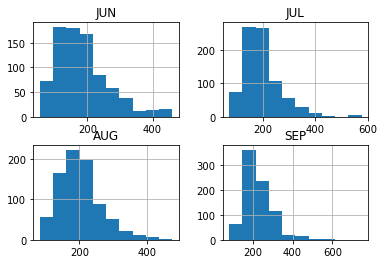

In [59]:
#Let's see how the rainfall index vary during rainy season

import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [60]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.58333333, 0.58275058, 0.        , ..., 0.24197396, 0.21689401,
        0.27370822],
       [0.58333333, 0.58275058, 0.1       , ..., 0.15328811, 0.13151274,
        0.13721348],
       [0.58333333, 0.58275058, 0.2       , ..., 0.18479046, 0.286268  ,
        0.0551343 ],
       ...,
       [1.        , 1.        , 0.8       , ..., 0.33582449, 0.66894695,
        0.68216256],
       [1.        , 1.        , 0.9       , ..., 0.31348069, 0.43433203,
        0.58096062],
       [1.        , 1.        , 1.        , ..., 0.22622825, 0.37333569,
        0.61803626]])

In [61]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('done')

done


In [62]:
#Let's see how our train set looks like
x_train.head()

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,0V,DEC,ANNUAL RAINFALL
285,104,104002,2010,132.35,147.80,189.22,282.07,204.16,281.77,184.29,205.93,183.01,121.62,259.54,220.18,2411.96
75,109,109001,2009,86.13,35.56,237.37,183.95,239.64,54.51,177.39,294.59,205.61,215.24,474.45,100.80,2305.25
755,113,113007,2007,665.20,476.31,229.65,290.45,171.51,287.15,354.60,266.08,358.46,257.24,371.74,526.44,4254.84
617,112,112010,2001,248.31,166.11,304.94,213.58,119.12,334.54,130.77,152.89,390.77,667.85,275.17,278.29,3282.32
313,101,101002,2005,51.45,93.53,163.38,171.01,218.36,68.27,234.98,307.62,132.12,268.09,247.55,205.03,2161.37


In [63]:
y_train.head()

285    1
75     1
755    0
617    0
313    0
Name: FLOOD , dtype: int64

# Prediction Algorithms:

# 1. KNN Classifier

In [64]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [65]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0]


In [66]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
549    1
392    0
646    0
750    0
411    0
      ..
391    0
474    0
680    0
794    0
595    0
Name: FLOOD , Length: 165, dtype: int64


In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [69]:
knn_accuracy.mean()

0.6121212121212122

# 2. Logistic Regression

In [70]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [72]:
lr_accuracy.mean()

0.6424242424242425

In [73]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
##print('Predicted No. Occurence of flood')
print(y_predict)

Predicted chances of flood
[1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1
 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0]


In [74]:
print('Actual chances of flood')
##print('Actual No. Occurence of flood')
print(y_test.values)

Actual chances of flood
[1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0]


In [75]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 60.000000
recall score: 35.820896
roc score: 56.175754


# 3. Decision tree classification

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.64545455, 0.69545455, 0.67272727])

In [77]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0]


In [78]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1
 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0]


In [79]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:73.333333
recall score:76.119403
roc score:73.773987


# 4. Random Forest Classification

In [80]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [81]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [82]:
rmf_clf_acc

array([0.61363636, 0.64090909, 0.62272727])

In [83]:
y_pred = rmf_clf.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:67.878788
recall score:62.686567
roc score:67.057569


# 5. Enseble Learning

In [85]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [86]:
voting_clf = voting.fit(x_train, y_train)

In [87]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5454545454545454
RandomForestClassifier 0.703030303030303
KNeighborsClassifier 0.6606060606060606
VotingClassifier 0.6545454545454545


# Comparing all the prediction models

In [88]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.660606
1   LR  0.539394
2   DT  0.727273
3   RF  0.745455
4   EL  0.654545


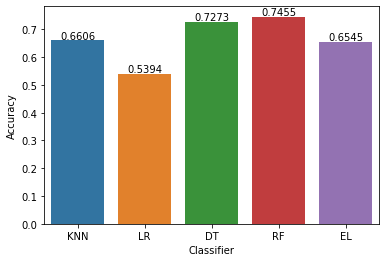

In [89]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

# As we can observe and Compare different Models and Choose the best One.

# Give an Upvote if you like this Notebook.